In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib
import tkinter
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('physical_attributes.csv', delimiter=',')

In [3]:
data.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,1,21,65.78331,112.9925,18.357646
1,1,35,71.51521,136.4873,18.762652
2,1,27,69.39874,153.0269,22.338985
3,0,24,68.21660,142.3354,21.504612
4,1,18,67.78781,144.2971,22.077669


In [4]:
data.describe()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
count,25000.000000,25000.000000,24981.000000,24984.000000,24950.000000
mean,0.496400,26.499600,67.992968,127.078208,19.321368
std,0.499997,5.190379,1.901481,11.663043,1.552091
min,0.000000,18.000000,60.278360,78.014760,13.070879
25%,0.000000,22.000000,66.704930,119.307775,18.278339
50%,0.000000,27.000000,67.995920,127.156700,19.302160
75%,1.000000,31.000000,69.272370,134.894050,20.357547
max,1.000000,35.000000,75.152800,170.924000,26.023756


In [5]:
print (data['BMI'])
print (data['BMI'].isnull())

0        18.357646
1        18.762652
2        22.338985
3        21.504612
4        22.077669
           ...    
24995    17.179051
24996    20.281947
24997    19.864050
24998    20.392540
24999    18.506121
Name: BMI, Length: 25000, dtype: float64
0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Name: BMI, Length: 25000, dtype: bool


In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(9)

C:\Users\Vandana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
Age,0,0.0
BMI,50,0.2
Height(Inches),19,0.1
Sex,0,0.0
Weight(Pounds),16,0.1


In [7]:
median = data['Height(Inches)'].median()
data['Height(Inches)'].fillna(median, inplace=True)

In [8]:
median = data['BMI'].median()
data['BMI'].fillna(median, inplace=True)

In [9]:
median = data['Weight(Pounds)'].median()
data['Weight(Pounds)'].fillna(median, inplace=True)

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(9)

,Total,%
BMI,0,0.0
Weight(Pounds),0,0.0
Height(Inches),0,0.0
Age,0,0.0
Sex,0,0.0


In [11]:
data1 = [data]
for dataset in data1:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [12]:
data1 = [data]
for dataset in data1:
    dataset.loc[ dataset['Height(Inches)'] <= 60, 'Height(Inches)'] = 0
    dataset.loc[(dataset['Height(Inches)'] > 60) & (dataset['Height(Inches)'] <= 64), 'Height(Inches)'] = 1
    dataset.loc[(dataset['Height(Inches)'] > 64) & (dataset['Height(Inches)'] <= 66), 'Height(Inches)'] = 2
    dataset.loc[(dataset['Height(Inches)'] > 66) & (dataset['Height(Inches)'] <= 68), 'Height(Inches)'] = 3
    dataset.loc[(dataset['Height(Inches)'] > 68) & (dataset['Height(Inches)'] <= 70), 'Height(Inches)'] = 4
    dataset.loc[(dataset['Height(Inches)'] > 70) & (dataset['Height(Inches)'] <= 74), 'Height(Inches)'] = 5
    dataset.loc[ dataset['Height(Inches)'] > 74, 'Height(Inches)'] = 6

In [13]:
data1 = [data]
for dataset in data1:
    dataset.loc[ dataset['Weight(Pounds)'] <= 78, 'Weight(Pounds)'] = 0
    dataset.loc[(dataset['Weight(Pounds)'] > 78) & (dataset['Weight(Pounds)'] <= 88), 'Weight(Pounds)'] = 1
    dataset.loc[(dataset['Weight(Pounds)'] > 88) & (dataset['Weight(Pounds)'] <= 98), 'Weight(Pounds)'] = 2
    dataset.loc[(dataset['Weight(Pounds)'] > 98) & (dataset['Weight(Pounds)'] <= 108), 'Weight(Pounds)'] = 3
    dataset.loc[(dataset['Weight(Pounds)'] > 108) & (dataset['Weight(Pounds)'] <= 118), 'Weight(Pounds)'] = 4
    dataset.loc[(dataset['Weight(Pounds)'] > 118) & (dataset['Weight(Pounds)'] <= 123), 'Weight(Pounds)'] = 5
    dataset.loc[(dataset['Weight(Pounds)'] > 123) & (dataset['Weight(Pounds)'] <= 128), 'Weight(Pounds)'] = 6
    dataset.loc[(dataset['Weight(Pounds)'] > 128) & (dataset['Weight(Pounds)'] <= 133), 'Weight(Pounds)'] = 7
    dataset.loc[(dataset['Weight(Pounds)'] > 133) & (dataset['Weight(Pounds)'] <= 143), 'Weight(Pounds)'] = 8
    dataset.loc[(dataset['Weight(Pounds)'] > 143) & (dataset['Weight(Pounds)'] <= 153), 'Weight(Pounds)'] = 9
    dataset.loc[(dataset['Weight(Pounds)'] > 153) & (dataset['Weight(Pounds)'] <= 163), 'Weight(Pounds)'] = 10
    dataset.loc[ dataset['Weight(Pounds)'] > 163, 'Weight(Pounds)'] = 11

In [14]:
data1 = [data]
for dataset in data1:
    #dataset['Height(Inches)'] = dataset['Height(Inches)'].astype(int)
    dataset.loc[ dataset['BMI'] <= 18.5, 'BMI'] = 0
    dataset.loc[(dataset['BMI'] > 18.5) & (dataset['BMI'] <= 24.9), 'BMI'] = 1
    dataset.loc[(dataset['BMI'] > 24.9) & (dataset['BMI'] <= 29.9), 'BMI'] = 2
    dataset.loc[ dataset['BMI'] > 29.9, 'BMI'] = 3

In [15]:
data.head(20)

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,1,2,2.0,4.0,0.0
1,1,5,5.0,8.0,1.0
2,1,3,4.0,10.0,1.0
3,0,3,4.0,8.0,1.0
4,1,1,3.0,9.0,1.0
5,1,2,4.0,6.0,0.0
6,0,5,4.0,8.0,1.0
7,0,2,5.0,8.0,1.0
8,1,4,3.0,4.0,0.0
9,0,3,3.0,5.0,1.0


In [16]:
data1 = [data]

for dataset in data1:
    dataset['Height(Inches)'] = dataset['Height(Inches)'].fillna(0)
    dataset['Height(Inches)'] = dataset['Height(Inches)'].astype(int)

In [17]:
data1 = [data]

for dataset in data1:
    dataset['Weight(Pounds)'] = dataset['Weight(Pounds)'].fillna(0)
    dataset['Weight(Pounds)'] = dataset['Weight(Pounds)'].astype(int)

In [18]:
data1 = [data]

for dataset in data1:
    dataset['BMI'] = dataset['BMI'].fillna(0)
    dataset['BMI'] = dataset['BMI'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
Sex               25000 non-null int64
Age               25000 non-null int32
Height(Inches)    25000 non-null int32
Weight(Pounds)    25000 non-null int32
BMI               25000 non-null int32
dtypes: int32(4), int64(1)
memory usage: 586.1 KB


In [20]:
data.head(20)

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,1,2,2,4,0
1,1,5,5,8,1
2,1,3,4,10,1
3,0,3,4,8,1
4,1,1,3,9,1
5,1,2,4,6,0
6,0,5,4,8,1
7,0,2,5,8,1
8,1,4,3,4,0
9,0,3,3,5,1


In [21]:
labels=data["BMI"]
features = data.iloc[:,0:8]

from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [22]:
X_train1 = X_train.drop("BMI", axis=1)
#Y_train1 = X_train["BMI"]
X_test1 = X_test.drop("BMI", axis=1)
#Y_test1 = X_test["BMI"]

In [23]:
## Neural Network Using Tensorflow - Keras
### Sequential Model 

input_dimension = X_train1.shape[1] # this represent number of features

### hyper parameters
epochs = 20
batch_size = 100

### model
model = Sequential()
model.add(Dense(100, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 12,894
Trainable params: 12,894
Non-trainable params: 0
____________________________________________________

In [24]:
history = model.fit(X_train1, y_train, epochs=epochs, batch_size=batch_size,
          validation_data=(X_test1, y_test))

Train on 16750 samples, validate on 8250 samples
Epoch 1/20
16750/16750 [==============================] - 1s 70us/sample - loss: 0.2878 - accuracy: 0.8840 - val_loss: 0.2102 - val_accuracy: 0.9185
Epoch 2/20
16750/16750 [==============================] - 1s 42us/sample - loss: 0.2268 - accuracy: 0.9116 - val_loss: 0.2603 - val_accuracy: 0.8698
Epoch 3/20
16750/16750 [==============================] - 1s 41us/sample - loss: 0.2196 - accuracy: 0.9133 - val_loss: 0.1998 - val_accuracy: 0.9272
Epoch 4/20
16750/16750 [==============================] - 1s 42us/sample - loss: 0.2141 - accuracy: 0.9174 - val_loss: 0.2015 - val_accuracy: 0.9184
Epoch 5/20
16750/16750 [==============================] - 1s 41us/sample - loss: 0.2092 - accuracy: 0.9177 - val_loss: 0.1964 - val_accuracy: 0.9190
Epoch 6/20
16750/16750 [==============================] - 1s 41us/sample - loss: 0.2099 - accuracy: 0.9171 - val_loss: 0.2068 - val_accuracy: 0.9184
Epoch 7/20
16750/16750 [==============================] -

In [25]:
print('\nhistory dict:', history.history)


history dict: {'loss': [0.28782019361631195, 0.22675666355375035, 0.21956180107237688, 0.21407499673651226, 0.2092011554472482, 0.20993336697122944, 0.20709316721603052, 0.21574675351826111, 0.20910077753351697, 0.204501230414234, 0.20434866592065612, 0.20247900588298912, 0.2029872221733207, 0.20566767051593582, 0.19549677460940917, 0.19635962234504187, 0.20300098635367494, 0.19529903724567213, 0.1927647841955299, 0.193133118259373], 'accuracy': [0.884, 0.9116418, 0.9132537, 0.91743284, 0.9176716, 0.9170746, 0.9176716, 0.9153433, 0.9162985, 0.91683584, 0.9162388, 0.91665673, 0.91814923, 0.91814923, 0.9204776, 0.9188657, 0.91773134, 0.91940296, 0.9220896, 0.92202985], 'val_loss': [0.2102397671251586, 0.260327491886688, 0.1998043274337595, 0.2015361192551526, 0.19636639555295307, 0.20682412340785516, 0.21060042850898975, 0.19420808282765475, 0.20395459577892766, 0.21378246852845856, 0.19363783977248453, 0.18571087329676658, 0.19580003754659134, 0.18706404810602015, 0.18997029887907432, 

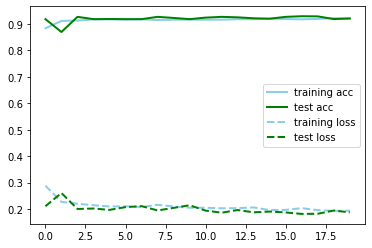

In [26]:
plt.plot( history.history['accuracy'], color='skyblue', linewidth=2, label='training acc')
plt.plot( history.history['val_accuracy'], color='green', linewidth=2, label='test acc')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="test loss")
plt.legend()

In [27]:
y_pred = model.predict_classes(X_test1)

In [28]:
score = model.evaluate(X_test1, y_test,verbose=1)

print(score)

8250/8250 [==============================] - 0s 49us/sample - loss: 0.1870 - accuracy: 0.9207
[0.18703519545179426, 0.92072725]


In [29]:
model.save("Obesity_Model.h5")
print("Saved model to disk")

Saved model to disk
